# Proyecto final: La desigualdad socioeconómica y su impacto en el acceso a la educación superior

# Introducción

In [14]:
#posible introduccion mencionar el tipo de archivos que tenemos y que debido a esto la extension puede no ser tanta

# Contexto y motivación

# Preguntas objetivo

### De las preguntas planteadas en un inicio conservamos:

### "nota sobre motivo de descarte de alguna pregunta"

#### • ¿Cuál es el tipo de colegio con la mayor tasa de abandono en el proceso de postulación universitaria
#### • ¿Qué tipo de institución educativa (privada, subvencionada o pública) presenta la mayor tasa de acceso a la educación superior entre sus egresados?
#### • ¿Cuáles son los resultados promedio en la prueba de acceso a la educación superior según el tipo de colegio en cada comuna
#### • ¿En qué comunas se concentran los diferentes tipos de colegios y cómo se relaciona esto con los resultados de egreso de los estudiantes??

### Mientras que las preguntas que surgieron a lo largo del camino fueron:

# Datos

### Los datos conseguidos ademas de por categoria (admision, matricula, postulaciones y rendicion) se encontraban repartidos por año de emision, por lo que decidimos realizar una breve limpieza de los datos asi como unificarlos para tener todos los años en un mismo archivo. proceso realizado en los documentos descritos en la carpeta del repositorio llamada *Limpieza_De_Datos*, estos archivos estan hechos para generar los archivos que se usan en este notebook

### Imports

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Datos sobre admisión de cada año

In [342]:
admision = pd.read_csv("Dataframe_inscripciones.csv", low_memory=False)

In [137]:
admision

,ID_aux,ANYO_PROCESO,SEXO,GRUPO_DEPENDENCIA,FECHA_NACIMIENTO,ANYO_EGRESO,CODIGO_REGION_D,CODIGO_COMUNA_D,INGRESO_PERCAPITA_GRUPO_FA
0,9265592376510,2023,1,4.0,92004,2022.0,15,15101,2.0
1,9492594679209,2023,1,4.0,62004,2021.0,15,15101,2.0
2,9325593372588,2023,1,4.0,22005,2022.0,15,15101,2.0
3,3443934474359,2023,1,4.0,61992,2010.0,15,15101,1.0
4,9355593175583,2023,1,4.0,122004,2022.0,15,15101,99.0
...,...,...,...,...,...,...,...,...,...
1456224,9997599679743,2019,2,2.0,12001,2018.0,13,13126,1.0
1456225,9997599779750,2019,2,3.0,12001,2018.0,2,2201,2.0
1456226,9997939341287,2019,2,3.0,32001,2018.0,13,13404,1.0
1456227,9998599379869,2019,2,3.0,72000,2018.0,8,8205,1.0


### Datos sobre postulación de cada año

In [140]:
postulaciones = pd.read_csv("Dataframe_postulaciones.csv", low_memory=False)

In [141]:
postulaciones

,ID_aux,SITUACION_POSTULANTE,PTJE_PREF_01,SITUACION_POSTULANTE_BEA,PTJE_PREF_01_BEA,SITUACION_POSTULANTE_PACE,PTJE_PREF_01_PACE
0,1900070103,P,543.90,NaN,NaN,NaN,NaN
1,1900170136,P,794.95,NaN,NaN,NaN,NaN
2,1900670175,P,570.10,NaN,NaN,NaN,NaN
3,1900870116,P,719.90,NaN,NaN,NaN,NaN
4,2900370264,P,522.90,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
773147,9977599877703,P,622.80,NaN,NaN,NaN,NaN
773148,9979599877997,P,599.20,NaN,NaN,P,817.014
773149,9985599478544,P,504.80,NaN,NaN,NaN,NaN
773150,9987599278786,P,545.30,NaN,NaN,NaN,NaN


### Datos sobre matrícula de cada año

In [343]:
matriculas = pd.read_csv("Dataframe_matriculas.csv", low_memory=False)

In [145]:
matriculas

,ID_aux,VIA,PTJE_POND,AÑO
0,267832678788,1,513.6,2023.0
1,016130170616,1,565.85,2023.0
2,514305173430,1,724.7,2023.0
3,042500470254,1,697.6,2023.0
4,699806974987,1,722.0,2023.0
...,...,...,...,...
501283,419145141624,1,727.0,2019.0
501284,265928647737,1,607.8,2019.0
501285,444844448720,1,588.3,2019.0
501286,816481140157,1,596.8,2019.0


### Datos rendición de pruebas de cada año

In [148]:
rendicion = pd.read_csv("Dataframe_rendiciones.csv", low_memory=False)

In [149]:
rendicion

,AÑO,ID_aux,GRUPO_DEPENDENCIA,CODIGO_REGION,CODIGO_COMUNA,PROMEDIO_NOTAS,PTJE_NEM,PTJE_RANKING,CLEC_REG_ACTUAL,MATE1_REG_ACTUAL,MATE2_REG_ACTUAL,HCSOC_REG_ACTUAL,CIEN_REG_ACTUAL,MATE_ACTUAL
0,2023,0000900170003,3.0,13.0,13401.0,5.03,429,429,0.0,402.0,351.0,423.0,0.0,NaN
1,2023,0000900470024,3.0,13.0,13107.0,5.90,689,766,475.0,0.0,0.0,0.0,0.0,NaN
2,2023,0000900670068,2.0,1.0,1101.0,5.00,415,415,536.0,413.0,0.0,489.0,0.0,NaN
3,2023,0001900070103,2.0,14.0,14202.0,5.60,599,599,589.0,437.0,0.0,0.0,478.0,NaN
4,2023,0001900070149,3.0,14.0,14101.0,5.28,506,517,0.0,0.0,0.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1357247,2019,9996599179618,3.0,9.0,9101.0,5.88,597,776,309.0,NaN,NaN,446.0,463.0,426.0
1357248,2019,9997599679743,2.0,13.0,13123.0,6.00,622,693,517.0,NaN,NaN,354.0,0.0,567.0
1357249,2019,9997599779750,3.0,2.0,2201.0,5.95,612,657,517.0,NaN,NaN,526.0,0.0,355.0
1357250,2019,9997939341287,3.0,13.0,13404.0,6.30,685,697,372.0,NaN,NaN,0.0,463.0,426.0


# Análisis exploratorio de datos

### seccion de desarrollo para la pregunta: ¿Qué tipo de institución educativa (privada, subvencionada o pública) presenta la mayor tasa de acceso a la educación superior entre sus egresados?

In [388]:
matriculas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501288 entries, 0 to 501287
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID_aux     501288 non-null  object 
 1   VIA        501288 non-null  int64  
 2   PTJE_POND  501288 non-null  object 
 3   AÑO        405350 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.3+ MB


In [390]:
rendicion.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1357252 entries, 0 to 1357251
Data columns (total 14 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   AÑO                1357252 non-null  int64  
 1   ID_aux             1357252 non-null  object 
 2   GRUPO_DEPENDENCIA  1342872 non-null  float64
 3   CODIGO_REGION      1352149 non-null  float64
 4   CODIGO_COMUNA      1342872 non-null  float64
 5   PROMEDIO_NOTAS     1357252 non-null  float64
 6   PTJE_NEM           1357252 non-null  int64  
 7   PTJE_RANKING       1357252 non-null  int64  
 8   CLEC_REG_ACTUAL    1335955 non-null  float64
 9   MATE1_REG_ACTUAL   272568 non-null   float64
 10  MATE2_REG_ACTUAL   272568 non-null   float64
 11  HCSOC_REG_ACTUAL   1335955 non-null  float64
 12  CIEN_REG_ACTUAL    1335955 non-null  float64
 13  MATE_ACTUAL        1063387 non-null  float64
dtypes: float64(10), int64(3), object(1)
memory usage: 145.0+ MB


In [392]:
# crear copias de los dataframes para no alterar los originales
copy_matriculas = matriculas.copy()
copy_rendicion = rendicion.copy()

# filtro para que los datos solo sean de la  region metropolitana de santiago, codigo ded regio == 13
copy_rendicion = copy_rendicion[copy_rendicion["CODIGO_REGION"]==13]

In [393]:
# ya que el type de las columnas ID_aux es distinto voy a cambiarlo para que esten ambos como object
copy_matriculas["ID_aux"] = copy_matriculas["ID_aux"].astype("str")
copy_matriculas["ID_aux"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 501288 entries, 0 to 501287
Series name: ID_aux
Non-Null Count   Dtype 
--------------   ----- 
501288 non-null  object
dtypes: object(1)
memory usage: 3.8+ MB


In [395]:
# ahora se juntan los datos de rendicion y de matricula a partir de la columna ID_aux
proceso = pd.merge(copy_matriculas, copy_rendicion, on="ID_aux")
proceso

,ID_aux,VIA,PTJE_POND,AÑO_x,AÑO_y,GRUPO_DEPENDENCIA,CODIGO_REGION,CODIGO_COMUNA,PROMEDIO_NOTAS,PTJE_NEM,PTJE_RANKING,CLEC_REG_ACTUAL,MATE1_REG_ACTUAL,MATE2_REG_ACTUAL,HCSOC_REG_ACTUAL,CIEN_REG_ACTUAL,MATE_ACTUAL
0,016130170616,1,565.85,2023.0,2023,2.0,13.0,13127.0,5.50,577,577,606.0,452.0,0.0,489.0,0.0,NaN
1,699806974987,1,722.0,2023.0,2023,3.0,13.0,13119.0,5.68,623,657,729.0,601.0,0.0,874.0,0.0,NaN
2,8577985477741,1,730.2,2023.0,2023,2.0,13.0,13101.0,6.15,757,770,701.0,595.0,0.0,767.0,0.0,NaN
3,8759987675960,1,463.65,2023.0,2023,3.0,13.0,13123.0,4.90,384,384,596.0,491.0,0.0,702.0,0.0,NaN
4,8145981274524,1,545.5,2023.0,2023,4.0,13.0,13103.0,5.18,473,537,0.0,499.0,428.0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223712,2495524979573,1,525.9,2019.0,2019,3.0,13.0,13402.0,6.65,757,805,445.0,NaN,NaN,512.0,488.0,465.0
223713,6882168578250,1,791.81,2019.0,2019,1.0,13.0,13122.0,6.98,825,850,766.0,NaN,NaN,696.0,0.0,775.0
223714,401445043,1,515.3,2019.0,2019,1.0,13.0,13114.0,5.00,415,420,547.0,NaN,NaN,0.0,537.0,535.0
223715,1239142260,1,593.55,2019.0,2019,1.0,13.0,13114.0,5.68,554,554,563.0,NaN,NaN,0.0,687.0,631.0


In [397]:
print(f"El largo del dataframe de rendicion es: {len(copy_rendicion)}")
print(f"la cantidad de gente que rindio la prueba y se matriculo es de: {len(proceso)}")
print(f"Significando que se matriculo un aproximado del {len(proceso)*100//len(copy_rendicion)}% de las personas que rindieron la prueba")

El largo del dataframe de rendicion es: 531598
la cantidad de gente que rindio la prueba y se matriculo es de: 223717
Significando que se matriculo un aproximado del 42% de las personas que rindieron la prueba


In [398]:
# ahora se eliminan las filas cuya columna GRUPO_DEPENDENCIA es NaN ya que es lo que nos permite saber el tipo de establecimiento del alumno
proceso.dropna(subset = ["GRUPO_DEPENDENCIA"], inplace=True)
print(f"Nos quedan {len(proceso)} datos")
print(f"Se elimino un {100-(len(proceso)*100//697739)}% de los datos")

Nos quedan 222235 datos
Se elimino un 69% de los datos


In [399]:
# cambio de float a int por preferencia
proceso["GRUPO_DEPENDENCIA"] = proceso["GRUPO_DEPENDENCIA"].astype("int")
proceso["GRUPO_DEPENDENCIA"].value_counts()

GRUPO_DEPENDENCIA
2    113725
1     63384
3     44189
4       937
Name: count, dtype: int64

In [400]:
# los datos de la columna GRUPO_DEPENDENCIA se encuentran como categorias, explicadas en el documento asociado a cada conjunto de datos
# 1 = Particular pagado (privado)
# 2 = Particular subvencionado (subvencionado)
# 3 = Municipal (publico)
# estos son los que se usaran en el analisis, por lo que el 4 no se contara
proceso = proceso[proceso["GRUPO_DEPENDENCIA"]!=4]
proceso["GRUPO_DEPENDENCIA"].value_counts()

GRUPO_DEPENDENCIA
2    113725
1     63384
3     44189
Name: count, dtype: int64

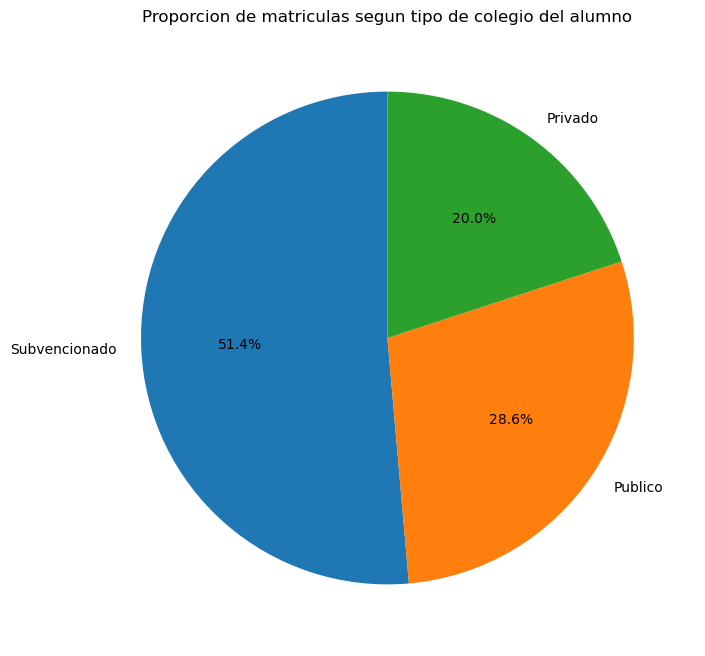

In [401]:
cantidades = proceso["GRUPO_DEPENDENCIA"].value_counts()
nombres = ["Subvencionado", "Publico", "Privado"]
plt.figure(figsize=(8, 8))
plt.pie(cantidades, labels=nombres, autopct="%1.1f%%", startangle=90)
plt.title("Proporcion de matriculas segun tipo de colegio del alumno")
plt.show()

In [405]:
# esto nos entrega los procentajes de las personas que se matricularon pero aun falta saber la proporcion de los alumnos que rinden la prueba segun cada
# institucion para tener una idea mejor de lo que significan estos datos
# ahora vamos a repetir parte del proceso anterior pero en el dataframe de rendiciones, y comparar las cantidades de cada institucion

In [409]:
copy_rendicion = rendicion.copy()
# eliminacion de NaN
copy_rendicion.dropna(subset = ["GRUPO_DEPENDENCIA"], inplace=True)
# pasar a int
copy_rendicion["GRUPO_DEPENDENCIA"] = copy_rendicion["GRUPO_DEPENDENCIA"].astype("int")
# eliminar los datos de categoria 4
copy_rendicion = copy_rendicion[copy_rendicion["GRUPO_DEPENDENCIA"]!=4]
copy_rendicion["GRUPO_DEPENDENCIA"].value_counts()

GRUPO_DEPENDENCIA
2    722865
3    423896
1    155849
Name: count, dtype: int64

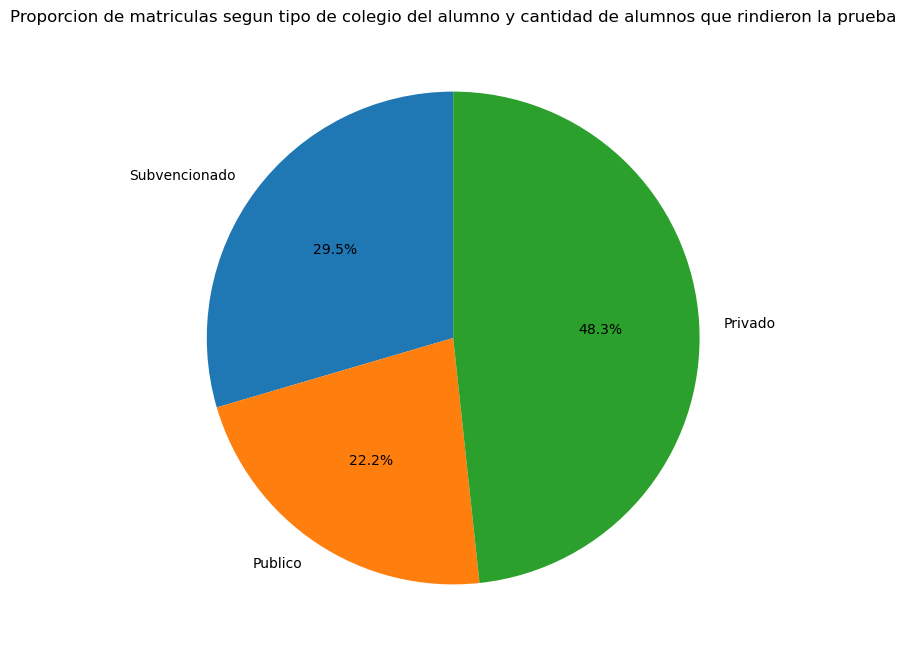

In [416]:
# los numeros son las cantidades que entrega .value_counts()
proporcion_subvencionados = 377383*100//722865
proporcion_publicos = 167431*100//423896
proporcion_privados = 133281*100//155849

cantidades = [proporcion_subvencionados, proporcion_publicos, proporcion_privados]
nombres = ["Subvencionado", "Publico", "Privado"]
plt.figure(figsize=(8, 8))
plt.pie(cantidades, labels=nombres, autopct="%1.1f%%", startangle=90)
plt.title("Proporcion de matriculas segun tipo de colegio del alumno y cantidad de alumnos que rindieron la prueba")
plt.show()

In [412]:
# Viendo que aunque no representa una gran cantidad del total de matriculados se aprecio que los egresados de instituciones privadas 
# que se logran matricular es mayor a la del resto de institutos

### seccion de desarrollo para la pregunta: ¿En qué comunas se concentran los diferentes tipos de colegios y cómo se relaciona esto con los resultados de egreso de los estudiantes?

In [168]:
# excel asociado a los datos
codComunas = pd.read_excel("Limpieza_De_Datos/datos_utilizados/rendicion/2023/Libro_CódigosADM2023_ArchivoC.xlsx", sheet_name="Anexo - ComunasRegiones")
codComunas

,COD REG.,REGION NOMBRE,COD.PRV,PRV NOMBRE,COD.COMUNA,COM NOMBRE
0,15,REGION DE ARICA Y PARINACOTA,151,ARICA,15101,ARICA
1,15,REGION DE ARICA Y PARINACOTA,151,ARICA,15102,CAMARONES
2,15,REGION DE ARICA Y PARINACOTA,152,PARINACOTA,15201,PUTRE
3,15,REGION DE ARICA Y PARINACOTA,152,PARINACOTA,15202,GENERAL LAGOS
4,1,REGION DE TARAPACA,11,IQUIQUE,1101,IQUIQUE
...,...,...,...,...,...,...
341,12,REGION DE MAGALLANES Y DE LA ANTARTICA CHILENA,123,TIERRA DEL FUEGO,12301,PORVENIR
342,12,REGION DE MAGALLANES Y DE LA ANTARTICA CHILENA,123,TIERRA DEL FUEGO,12302,PRIMAVERA
343,12,REGION DE MAGALLANES Y DE LA ANTARTICA CHILENA,123,TIERRA DEL FUEGO,12303,TIMAUKEL
344,12,REGION DE MAGALLANES Y DE LA ANTARTICA CHILENA,124,ULTIMA ESPERANZA,12401,NATALES


In [174]:
# se filtra para dejar solo los datos de la region metropolitana, esto debido a que nuestro trabajo en enfoca en ello
codComunas = codComunas[codComunas["REGION NOMBRE"]=="REGION METROPOLITANA DE SANTIAGO"]
# creamos un diccionario que relacione el codigo de la comuna con su nombre
dictComunas = codComunas.set_index("COD.COMUNA")["COM NOMBRE"].to_dict()
dictComunas

{13101: 'SANTIAGO',
 13102: 'CERRILLOS',
 13103: 'CERRO NAVIA',
 13104: 'CONCHALI',
 13105: 'EL BOSQUE',
 13106: 'ESTACION CENTRAL',
 13107: 'HUECHURABA',
 13108: 'INDEPENDENCIA',
 13109: 'LA CISTERNA',
 13110: 'LA FLORIDA',
 13111: 'LA GRANJA',
 13112: 'LA PINTANA',
 13113: 'LA REINA',
 13114: 'LAS CONDES',
 13115: 'LO BARNECHEA',
 13116: 'LO ESPEJO',
 13117: 'LO PRADO',
 13118: 'MACUL',
 13119: 'MAIPU',
 13120: 'ÑUÑOA',
 13121: 'PEDRO AGUIRRE CERDA',
 13122: 'PEÑALOLEN',
 13123: 'PROVIDENCIA',
 13124: 'PUDAHUEL',
 13125: 'QUILICURA',
 13126: 'QUINTA NORMAL',
 13127: 'RECOLETA',
 13128: 'RENCA',
 13129: 'SAN JOAQUIN',
 13130: 'SAN MIGUEL',
 13131: 'SAN RAMON',
 13132: 'VITACURA',
 13201: 'PUENTE ALTO',
 13202: 'PIRQUE',
 13203: 'SAN JOSE DE MAIPO',
 13301: 'COLINA',
 13302: 'LAMPA',
 13303: 'TILTIL',
 13401: 'SAN BERNARDO',
 13402: 'BUIN',
 13403: 'CALERA DE TANGO',
 13404: 'PAINE',
 13501: 'MELIPILLA',
 13502: 'ALHUE',
 13503: 'CURACAVI',
 13504: 'MARIA PINTO',
 13505: 'SAN PEDRO',
 

In [360]:
# se crea como una copia para no alterar el original
df = rendicion.copy()
# se hace una limpieza general

# se eliminan las columnas que no consideramos relevantes para este momento
df = df[["ID_aux", "GRUPO_DEPENDENCIA", "CODIGO_COMUNA"]]

# eliminacion de NaN
df.dropna(subset = ["GRUPO_DEPENDENCIA"], inplace=True)
df.dropna(subset = ["CODIGO_COMUNA"], inplace=True)

# se tranforma GRUPO_DEPENDENCIA de float a int
df["GRUPO_DEPENDENCIA"] = df["GRUPO_DEPENDENCIA"].astype("int")
# se tranforma CODIGO_COMUNA de float a int 
df["CODIGO_COMUNA"] = df["CODIGO_COMUNA"].astype("int")
df

,ID_aux,GRUPO_DEPENDENCIA,CODIGO_COMUNA
0,0000900170003,3,13401
1,0000900470024,3,13107
2,0000900670068,2,1101
3,0001900070103,2,14202
4,0001900070149,3,14101
...,...,...,...
1357247,9996599179618,3,9101
1357248,9997599679743,2,13123
1357249,9997599779750,3,2201
1357250,9997939341287,3,13404


In [361]:
df["NOMBRE_COMUNA"] = df["CODIGO_COMUNA"].map(dictComunas)
df
# ya que hay filas que no son de santiago se generan NAN por lo que se deben eliminar estas filas

,ID_aux,GRUPO_DEPENDENCIA,CODIGO_COMUNA,NOMBRE_COMUNA
0,0000900170003,3,13401,SAN BERNARDO
1,0000900470024,3,13107,HUECHURABA
2,0000900670068,2,1101,NaN
3,0001900070103,2,14202,NaN
4,0001900070149,3,14101,NaN
...,...,...,...,...
1357247,9996599179618,3,9101,NaN
1357248,9997599679743,2,13123,PROVIDENCIA
1357249,9997599779750,3,2201,NaN
1357250,9997939341287,3,13404,PAINE


In [362]:
df.dropna(subset = ["NOMBRE_COMUNA"], inplace=True)
df

,ID_aux,GRUPO_DEPENDENCIA,CODIGO_COMUNA,NOMBRE_COMUNA
0,0000900170003,3,13401,SAN BERNARDO
1,0000900470024,3,13107,HUECHURABA
5,0001900170136,2,13110,LA FLORIDA
6,0001900470154,2,13127,RECOLETA
8,0001900770142,3,13106,ESTACION CENTRAL
...,...,...,...,...
1357242,9990999779067,2,13604,PADRE HURTADO
1357245,9994599479410,2,13124,PUDAHUEL
1357246,9995999979507,3,13401,SAN BERNARDO
1357248,9997599679743,2,13123,PROVIDENCIA


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 527208 entries, 0 to 1357250
Data columns (total 4 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   ID_aux             527208 non-null  object
 1   GRUPO_DEPENDENCIA  527208 non-null  int32 
 2   CODIGO_COMUNA      527208 non-null  int32 
 3   NOMBRE_COMUNA      527208 non-null  object
dtypes: int32(2), object(2)
memory usage: 16.1+ MB


In [364]:
# se crean segun categoria para luego poder agrupar por NOMBRE_COMUNA sumando las filas, sacando el total de cada tipo de institucion por comuna
dummy = pd.get_dummies(df["GRUPO_DEPENDENCIA"])
dummy = dummy.applymap(lambda x: 1 if x == True else 0)
df = pd.concat([df, dummy], axis=1)
df

C:\Users\alejo\AppData\Local\Temp\ipykernel_24048\2814713335.py:3: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  dummy = dummy.applymap(lambda x: 1 if x == True else 0)


,ID_aux,GRUPO_DEPENDENCIA,CODIGO_COMUNA,NOMBRE_COMUNA,1,2,3,4
0,0000900170003,3,13401,SAN BERNARDO,0,0,1,0
1,0000900470024,3,13107,HUECHURABA,0,0,1,0
5,0001900170136,2,13110,LA FLORIDA,0,1,0,0
6,0001900470154,2,13127,RECOLETA,0,1,0,0
8,0001900770142,3,13106,ESTACION CENTRAL,0,0,1,0
...,...,...,...,...,...,...,...,...
1357242,9990999779067,2,13604,PADRE HURTADO,0,1,0,0
1357245,9994599479410,2,13124,PUDAHUEL,0,1,0,0
1357246,9995999979507,3,13401,SAN BERNARDO,0,0,1,0
1357248,9997599679743,2,13123,PROVIDENCIA,0,1,0,0


In [367]:
# eliminamos las columnas GRUPO_DEPENDENCIA y CODIGO_COMUNA ya que no las usaremos mas, tambien renombraremos las columnas
# generadas con dummy para hacerlas mas claras

In [369]:
df.rename(columns={1: "PRIVADO", 2: "SUBVENCIONADO", 3:"PUBLICO"}, inplace=True)
df = df[["NOMBRE_COMUNA", "PRIVADO", "SUBVENCIONADO", "PUBLICO"]]
df = df.groupby("NOMBRE_COMUNA").sum(numeric_only=True)

In [371]:
df

,PRIVADO,SUBVENCIONADO,PUBLICO
NOMBRE_COMUNA,,,
ALHUE,0,0,227
BUIN,1516,3080,3270
CALERA DE TANGO,1033,439,405
CERRILLOS,0,3551,247
CERRO NAVIA,0,1442,0
COLINA,4540,3418,4839
CONCHALI,0,2246,1349
CURACAVI,101,1445,831
EL BOSQUE,424,8749,1227


In [376]:
admision.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1456229 entries, 0 to 1456228
Data columns (total 9 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   ID_aux                      1456229 non-null  object 
 1   ANYO_PROCESO                1456229 non-null  int64  
 2   SEXO                        1456229 non-null  int64  
 3   GRUPO_DEPENDENCIA           1439376 non-null  float64
 4   FECHA_NACIMIENTO            1456229 non-null  int64  
 5   ANYO_EGRESO                 1455895 non-null  float64
 6   CODIGO_REGION_D             1456229 non-null  int64  
 7   CODIGO_COMUNA_D             1456229 non-null  int64  
 8   INGRESO_PERCAPITA_GRUPO_FA  1428607 non-null  float64
dtypes: float64(3), int64(5), object(1)
memory usage: 100.0+ MB


In [377]:
# conseguir enlazar el ingreso per capita con la comuna asi como puntaje ponderado
baseProceso = pd.merge(matriculas.copy(), admision.copy(), on="ID_aux")

# en general ahora voy a hacer el mismo proceso de antes para añadir las columnas de interes a df de distribucion por comuna
baseProceso["NOMBRE_COMUNA"] = baseProceso["CODIGO_COMUNA_D"].map(dictComunas)
baseProceso = baseProceso[["NOMBRE_COMUNA", "INGRESO_PERCAPITA_GRUPO_FA", "PTJE_POND"]]

# eliminar NaN
baseProceso.dropna(subset = ["INGRESO_PERCAPITA_GRUPO_FA"], inplace=True)
baseProceso.dropna(subset = ["NOMBRE_COMUNA"], inplace=True)

# cambio de type de PTJE_POND
baseProceso["PTJE_POND"] = baseProceso["PTJE_POND"].astype("float")

# agrupamos y sacamos promedio del INGRESO_PERCAPITA_GRUPO_FA
baseProceso = baseProceso.groupby("NOMBRE_COMUNA").mean(numeric_only=True).round(2)
baseProceso

,INGRESO_PERCAPITA_GRUPO_FA,PTJE_POND
NOMBRE_COMUNA,,
ALHUE,52124.16,644.14
BUIN,93546.20,644.16
CALERA DE TANGO,378855.51,654.99
CERRILLOS,139710.98,625.51
CERRO NAVIA,42743.15,622.51
COLINA,364933.23,668.25
CONCHALI,54428.72,622.19
CURACAVI,77630.01,630.17
EL BOSQUE,64088.01,620.54


In [384]:
ComunasPromedioIngresos = pd.concat([df ,baseProceso], axis=1)
ComunasPromedioIngresos

,PRIVADO,SUBVENCIONADO,PUBLICO,INGRESO_PERCAPITA_GRUPO_FA,PTJE_POND
NOMBRE_COMUNA,,,,,
ALHUE,0,0,227,52124.16,644.14
BUIN,1516,3080,3270,93546.20,644.16
CALERA DE TANGO,1033,439,405,378855.51,654.99
CERRILLOS,0,3551,247,139710.98,625.51
CERRO NAVIA,0,1442,0,42743.15,622.51
COLINA,4540,3418,4839,364933.23,668.25
CONCHALI,0,2246,1349,54428.72,622.19
CURACAVI,101,1445,831,77630.01,630.17
EL BOSQUE,424,8749,1227,64088.01,620.54


---
### ¿Cuál es el tipo de colegio con la mayor tasa de abandono en el proceso de postulación universitaria?

In [344]:
inscripcion = pd.read_csv("Dataframe_inscripciones.csv", low_memory=False)
postulaciones = pd.read_csv("Dataframe_postulaciones.csv", low_memory=False)
matriculas = pd.read_csv("Dataframe_matriculas", low_memory=False)
rendicion = pd.read_csv("Dataframe_rendiciones", low_memory=False)

In [345]:
# Eliminar datos nulos, no aportan al análisis
rendicion = rendicion.dropna(subset=['GRUPO_DEPENDENCIA', 'ID_aux'])
inscripcion = inscripcion.dropna(subset=['GRUPO_DEPENDENCIA', 'ID_aux'])

In [346]:
# Cambiar a tipo str, para que los ids de ambos dataframe sean del mismo tipo (matricuas - rendicion)
matriculas["ID_aux"] = matriculas["ID_aux"].astype("str")

# Renombrar columnas para que tengan el mismo nombre en ambos dataframes (matricuas - rendicion)
inscripcion.rename(columns={'CODIGO_REGION_D': 'CODIGO_REGION'}, inplace=True)

# Revisar cambios
matriculas.info()
print("\n")
inscripcion.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501288 entries, 0 to 501287
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   ID_aux     501288 non-null  object 
 1   VIA        501288 non-null  int64  
 2   PTJE_POND  501288 non-null  float64
 3   AÑO        501288 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 15.3+ MB




Index(['ID_aux', 'ANYO_PROCESO', 'SEXO', 'GRUPO_DEPENDENCIA',
       'FECHA_NACIMIENTO', 'ANYO_EGRESO', 'CODIGO_REGION', 'CODIGO_COMUNA_D',
       'INGRESO_PERCAPITA_GRUPO_FA'],
      dtype='object')

In [347]:
# Crear un DataFrame combinando 'rendicion' y 'matriculas' mediante 'ID_aux'
matriculas_rendicion = pd.merge(matriculas, rendicion[['ID_aux', 'CODIGO_REGION', 'GRUPO_DEPENDENCIA']],
                                on='ID_aux', how='inner')
matriculas_rendicion

,ID_aux,VIA,PTJE_POND,AÑO,CODIGO_REGION,GRUPO_DEPENDENCIA
0,514305173430,1,724.70,2023,5.0,3.0
1,514305173430,1,724.70,2023,5.0,3.0
2,699806974987,1,722.00,2023,13.0,3.0
3,642806479286,1,756.95,2023,4.0,2.0
4,847468472749,1,632.00,2023,10.0,3.0
...,...,...,...,...,...,...
693112,1239142260,1,593.55,2019,13.0,1.0
693113,4403444982,1,688.30,2019,2.0,3.0
693114,24232242681,1,686.40,2019,13.0,3.0
693115,34663645236,1,691.05,2019,2.0,3.0


In [348]:
# Filtrar los datos combinados para la Región de Santiago
region= 13

inscripcion_stgo = inscripcion[inscripcion['CODIGO_REGION'] == region]
rendicion_stgo = rendicion[rendicion['CODIGO_REGION'] == region]
matriculas_stgo = matriculas_rendicion[matriculas_rendicion['CODIGO_REGION'] == region]

In [349]:
# Listas de IDs en cada etapa
ids_inscripcion = set(inscripcion['ID_aux'])         # Inscritos
ids_rendicion = set(rendicion['ID_aux'])       # Rindieron la prueba
ids_matriculas = set(matriculas_stgo['ID_aux'])     # Matriculados

In [350]:
# Identificar IDs de estudiantes que abandonaron en la rendición
abandonos_rendicion_ids = ids_inscripcion - ids_rendicion

# Identificar IDs de estudiantes que abandonaron en la matrícula
abandonos_matricula_ids = ids_rendicion - ids_matriculas

In [352]:
inscripcion_stgo = inscripcion_stgo.copy()
rendicion_stgo = rendicion_stgo.copy()

# Crear DataFrames de abandonos en cada etapa
abandonos_rendicion = inscripcion_stgo[inscripcion_stgo['ID_aux'].isin(abandonos_rendicion_ids)]
abandonos_matricula = rendicion_stgo[rendicion_stgo['ID_aux'].isin(abandonos_matricula_ids)]

# Contar el número total de inscritos por tipo de colegio
total_inscritos = inscripcion_stgo.groupby('GRUPO_DEPENDENCIA', observed=True).size()

inscripcion_stgo['GRUPO_DEPENDENCIA'] = inscripcion_stgo['GRUPO_DEPENDENCIA'].astype('category')
# Asignar etiquetas descriptivas a las categorías
inscripcion_stgo['GRUPO_DEPENDENCIA'] = inscripcion_stgo['GRUPO_DEPENDENCIA'].cat.rename_categories({
    1: 'Privado',          # Particular pagado
    2: 'Subvencionado',    # Particular subvencionado
    3: 'Público'           # Municipal
})

rendicion_stgo['GRUPO_DEPENDENCIA'] = rendicion_stgo['GRUPO_DEPENDENCIA'].astype('category')
# Asignar etiquetas descriptivas a las categorías
rendicion_stgo['GRUPO_DEPENDENCIA'] = rendicion_stgo['GRUPO_DEPENDENCIA'].cat.rename_categories({
    1: 'Privado',          # Particular pagado
    2: 'Subvencionado',    # Particular subvencionado
    3: 'Público'           # Municipal
})

#eliminar tipo de colegio 4, no lo consideramos en nuestro análisis
inscripcion_stgo = inscripcion_stgo[inscripcion_stgo['GRUPO_DEPENDENCIA'] != 4]
rendicion_stgo = rendicion_stgo[rendicion_stgo['GRUPO_DEPENDENCIA'] != 4]
matriculas_stgo = matriculas_stgo[matriculas_stgo['GRUPO_DEPENDENCIA'] != 4]

# Contar el número de abandonos en cada etapa por tipo de colegio
abandonos_rendicion_count = abandonos_rendicion.groupby('GRUPO_DEPENDENCIA', observed=True).size()
abandonos_matricula_count = abandonos_matricula.groupby('GRUPO_DEPENDENCIA', observed=True).size()

# Calcular la tasa de abandono en cada etapa
tasa_abandono_rendicion = (abandonos_rendicion_count / total_inscritos) * 100
tasa_abandono_matricula = (abandonos_matricula_count / total_inscritos) * 100

# Crear un DataFrame para visualizar los resultados
tasa_abandono = pd.DataFrame({
    'Tasa Abandono Rendición (%)': tasa_abandono_rendicion.fillna(0),
    'Tasa Abandono Matrícula (%)': tasa_abandono_matricula.fillna(0)
})

# Sumar las tasas de abandono en rendición y matrícula para obtener una tasa acumulada
tasa_abandono['Tasa Abandono Total Acumulada (%)'] = (
    tasa_abandono['Tasa Abandono Rendición (%)'] + tasa_abandono['Tasa Abandono Matrícula (%)']
)

# Mostrar las tasas de abandono por tipo de colegio
print(tasa_abandono)

                   Tasa Abandono Rendición (%)  Tasa Abandono Matrícula (%)  \
GRUPO_DEPENDENCIA                                                             
Privado                               1.209937                    24.544429   
Subvencionado                         4.706954                    52.239738   
Público                               8.361091                    56.367859   

                   Tasa Abandono Total Acumulada (%)  
GRUPO_DEPENDENCIA                                     
Privado                                    25.754366  
Subvencionado                              56.946692  
Público                                    64.728950  


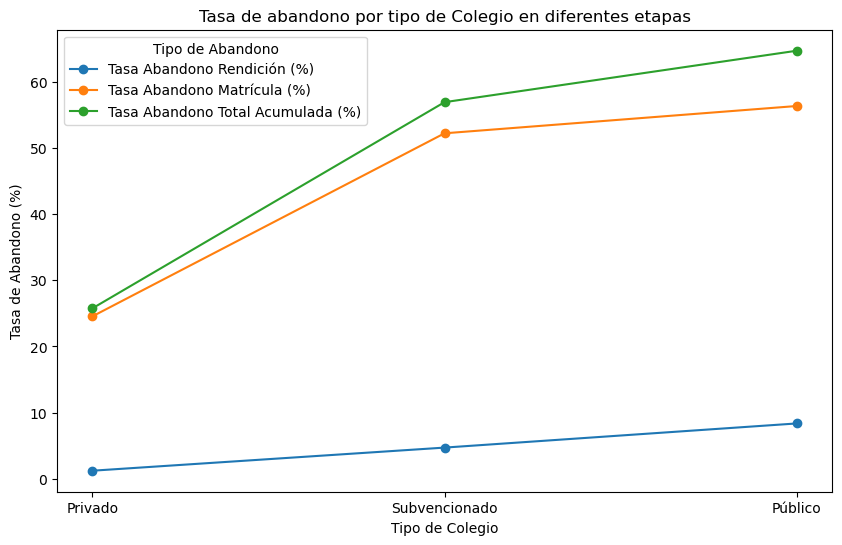

In [353]:
tasa_abandono.plot(kind='line', marker='o', figsize=(10, 6))
plt.title('Tasa de abandono por tipo de Colegio en diferentes etapas')
plt.xlabel('Tipo de Colegio')
plt.ylabel('Tasa de Abandono (%)')
plt.legend(title='Tipo de Abandono')
plt.xticks(ticks=range(len(tasa_abandono.index)), labels=tasa_abandono.index)
plt.show()

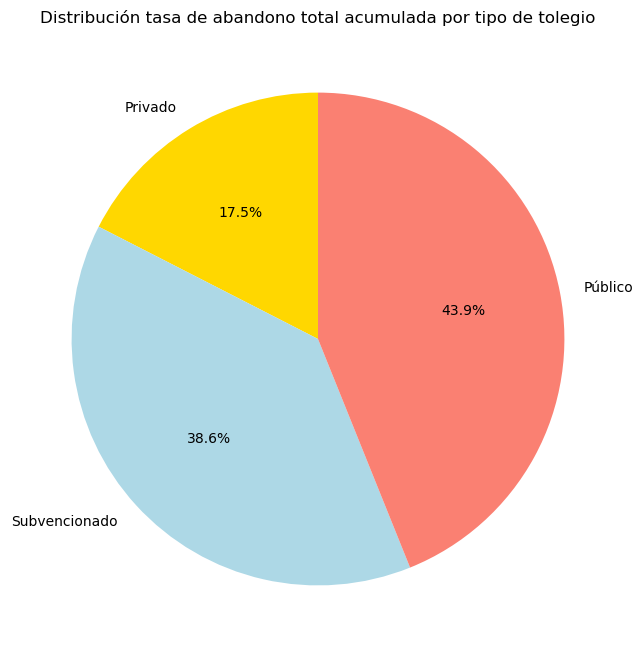

In [354]:
tasa_abandono['Tasa Abandono Total Acumulada (%)'].plot(
    kind='pie', autopct='%1.1f%%', startangle=90, figsize=(8, 8), colors=['gold', 'lightblue', 'salmon']
)
plt.title('Distribución tasa de abandono total acumulada por tipo de tolegio')
plt.ylabel('')
plt.show()

## Resumen de los resultados

### ¿Qué podría salir mal?

- Pandemia durante el trascurso del periodo delimitado (2019 - 2023)

- Cambio  de prueba durante el trancurso del periodo delimitado (2019 - 2023)